In [1]:
import os
import csv
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from tqdm import tqdm

#### Dataset info

In [2]:
# info: https://en.wikipedia.org/wiki/Iris_flower_data_set
DATA_URL = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
IRIS_FILE = "./iris.csv"

#### Download dataset

In [3]:
class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not os.path.isfile(IRIS_FILE):
    with DLProgress(unit="B", unit_scale=True, miniters=1, desc="Iris datasate") as pbar:
        urlretrieve(DATA_URL, IRIS_FILE, pbar.hook)

#### Loading files & extracting data

In [4]:
iris_headers = None
iris_rows = None
iris_labels = None

with open(IRIS_FILE, "r") as csv_file:
    temp = list(csv.reader(csv_file))
    iris_headers = temp[0]
    iris_rows = np.array([np.array(row[:-1]).astype(np.float32) for row in temp[1:]])
    iris_labels = [row[-1] for row in temp[1:]]

#### Data presentation

In [5]:
rows_to_show = 10

In [6]:
print(iris_headers)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']


In [7]:
for i in range(0, rows_to_show):
    print("Sample no. " + str(i) + " - " + str(iris_rows[i]))

Sample no. 0 - [ 5.0999999   3.5         1.39999998  0.2       ]
Sample no. 1 - [ 4.9000001   3.          1.39999998  0.2       ]
Sample no. 2 - [ 4.69999981  3.20000005  1.29999995  0.2       ]
Sample no. 3 - [ 4.5999999  3.0999999  1.5        0.2      ]
Sample no. 4 - [ 5.          3.5999999   1.39999998  0.2       ]
Sample no. 5 - [ 5.4000001   3.9000001   1.70000005  0.40000001]
Sample no. 6 - [ 4.5999999   3.4000001   1.39999998  0.30000001]
Sample no. 7 - [ 5.         3.4000001  1.5        0.2      ]
Sample no. 8 - [ 4.4000001   2.9000001   1.39999998  0.2       ]
Sample no. 9 - [ 4.9000001  3.0999999  1.5        0.1      ]


In [8]:
for i in range(0, rows_to_show):
    print("Label no. " + str(i) + " - " + str(iris_labels[i]))

Label no. 0 - Iris-setosa
Label no. 1 - Iris-setosa
Label no. 2 - Iris-setosa
Label no. 3 - Iris-setosa
Label no. 4 - Iris-setosa
Label no. 5 - Iris-setosa
Label no. 6 - Iris-setosa
Label no. 7 - Iris-setosa
Label no. 8 - Iris-setosa
Label no. 9 - Iris-setosa


In [9]:
print("Number of samples: " + str(len(iris_rows)))

Number of samples: 150


#### Divide data:

Classes will be divided so each set contains same amount of each class type.

In [10]:
classes = set(iris_labels)
num_of_classes = len(classes)
print("Detected num of different classes: " + str(num_of_classes))
print(classes)

Detected num of different classes: 3
{'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [11]:
samples_divided_by_classes = dict()
for row, label in zip(iris_rows, iris_labels):
    if label not in samples_divided_by_classes.keys():
        samples_divided_by_classes.update({label: list()})
    
    samples_divided_by_classes[label].append(row)

Spliting into train, validation, test sets.

In [12]:
test_samples_ratio = 0.65
val_test_samples_ratio = 0.5

In [13]:
train_rows = list()
val_rows = list()
test_rows = list()

train_labels = list()
val_labels = list()
test_labels = list()

print("Counting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + key + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nTrimming data: ")
for sample_class in classes:
    trimmed = samples_divided_by_classes[sample_class][:min(num_of_samples_per_class)]
    samples_divided_by_classes[sample_class] = trimmed
    print("- Trimming samples of class '" 
          + sample_class + "'to " + str(min(num_of_samples_per_class)) + ".")

print("\nCreating training set: ")
split_index = int(min(num_of_samples_per_class) * test_samples_ratio)
for sample_class in classes:
    train_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    train_labels = [sample_class for sample in train_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) 
          + " samples of class '" + sample_class + "' to training set.")
    samples_divided_by_classes[sample_class] = samples_divided_by_classes[sample_class][split_index:]

print("\nCounting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + key + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nCreating validation and train set: ")
split_index = int(min(num_of_samples_per_class) * val_test_samples_ratio)
for sample_class in classes:
    val_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    val_labels = [sample_class for sample in val_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) 
          + " samples of class '" + sample_class + "' to validation set.")
    
    test_rows.extend(samples_divided_by_classes[sample_class][split_index:])
    test_labels = [sample_class for sample in test_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][split_index:]))
          + " samples of class '" + sample_class + "' to test set.")
    
print("\nConverting types to ndarray.")
train_rows = np.array(train_rows)
val_rows = np.array(val_rows)
test_rows = np.array(test_rows)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)


Counting number of remaining samples to split: 
- Class: Iris-setosa, num samples: 50
- Class: Iris-versicolor, num samples: 50
- Class: Iris-virginica, num samples: 50

Trimming data: 
- Trimming samples of class 'Iris-versicolor'to 50.
- Trimming samples of class 'Iris-virginica'to 50.
- Trimming samples of class 'Iris-setosa'to 50.

Creating training set: 
- Adding 32 samples of class 'Iris-versicolor' to training set.
- Adding 32 samples of class 'Iris-virginica' to training set.
- Adding 32 samples of class 'Iris-setosa' to training set.

Counting number of remaining samples to split: 
- Class: Iris-setosa, num samples: 18
- Class: Iris-versicolor, num samples: 18
- Class: Iris-virginica, num samples: 18

Creating validation and train set: 
- Adding 9 samples of class 'Iris-versicolor' to validation set.
- Adding 9 samples of class 'Iris-versicolor' to test set.
- Adding 9 samples of class 'Iris-virginica' to validation set.
- Adding 9 samples of class 'Iris-virginica' to test set

In [14]:
print("Train data samples: " + str(len(train_rows)))
print("Validation data samples: " + str(len(val_rows)))
print("Test data samples: " + str(len(test_rows)))

Train data samples: 96
Validation data samples: 27
Test data samples: 27


#### Preparing similarity distance measures
Distance is a numerical value that shows similarity between two compared samples. It is calculated feature-wise. That means each of sample features are compared with similarity function and if those values are similar then distance is low otherwise its big. There are many ways to compute similarity distance between samples. Most common ones are:

Manhattan distance:

\begin{equation*}
 L1   = \sum_{i=1}^n  | q_i - p_i |
\end{equation*}     

Euclidean distance:

\begin{equation*}
 L2   = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
\end{equation*}

where:

- n - number of features
- i - current feature index
- p - compared sample
- q - another compared sample

In [15]:
def l1_manhattan_distance(p, q):
    return np.sum(np.abs(p - q), 1)

In [16]:
def l2_euclidean_distance(p, q):
    return np.sqrt(np.sum(np.square(p - q), 1))

#### K Nearest Neighbours
In this case "train_data" is a bit misleading. KNN is an algorithm where sample that we want to receive label for is being labeled based on comparison (similarity distance) to the K closest samples (called neighbours). That means each time classification is being performed, similarity distance between tested sample and EACH sample in "train_data" is being calculated. K samples with smallest distances to tested sample are picked. Most often occuring class type in picked K neighbours - decides on label given to tested sample.

- Step 1: Calculate distance between each sample in train_data and tested sample.
- Step 2: Pick K neighbours of tested sample.
- Step 3: Check which class occurs more often in picked neighbours.
- Step 4: Return most often occuring class label as a prediction for tested sample.

Note: There is possibility that there will the same amount of each class in selected neighbours. In such situation class label could be picked randomly or not returned at all depending on algorithm author.

In [17]:
def getNearestNeighbors(train_data, train_labels, test_data, similarity_function, k):
    neighbors = list()
    for i in range(0, len(test_data)):
        # Step 1: Calculate distance between each sample in train_data and tested sample
        current_sample_distances = similarity_function(train_data, test_data[i])
        
        # Step 2: Pick K neighbours of tested sample
        indexes_of_closest_k_samples = current_sample_distances.argsort()[:k]
        current_sample_neighbors = train_labels[indexes_of_closest_k_samples]
        neighbors.append(current_sample_neighbors)
        
    return neighbors

In [18]:
def getResponses(all_neighbors):
    responses = list()
    for current_sample_neighbors in all_neighbors:
        current_sample_votes = dict()
        
        # Step 3: Check which class occurs more often in picked neighbours
        for neighbor in current_sample_neighbors:
            if neighbor in current_sample_votes:
                current_sample_votes[neighbor] += 1
            else:
                current_sample_votes[neighbor] = 1
                
        # Step 4: Return most often occuring class label as a prediction for tested sample  
        neighbor_with_most_votes = max(current_sample_votes, key=current_sample_votes.get)
        responses.append(neighbor_with_most_votes)
        
    return responses

In [19]:
def KNN(train_data, train_labels, test_data, similarity_function, k):
    neighbors = getNearestNeighbors(train_data, train_labels, test_data, similarity_function, k)
    return getResponses(neighbors)

#### Accuracy

In [20]:
def accuracy(predictions, ideal_values):
    correct_predictions = 0
    for prediction, ideal_value in zip(predictions, ideal_values):
        if prediction == ideal_value:
            correct_predictions += 1
    return correct_predictions / len(predictions)

#### Picking K

In [21]:
k_candidates = [number for number in range(1, 16)]

In [22]:
k_results = dict()
for k in k_candidates:
    predictions = KNN(train_rows, train_labels, val_rows, l2_euclidean_distance, k)
    acc = accuracy(predictions, val_labels)
    k_results.update({k: acc})

In [23]:
K = max(k_results, key=k_results.get)
print("Best results for K = " + str(K))

Best results for K = 1


#### Testing

In [24]:
predictions = KNN(train_rows, train_labels, test_rows, l2_euclidean_distance, K)
test_accuracy = accuracy(predictions, test_labels)

print("Accuracy for test set: " + str(test_accuracy)) 

Accuracy for test set: 1.0


#### Presenting results

In [25]:
def binarize_labels(labels):
    all_labels = list(set(labels))
    return np.array([all_labels.index(label) for label in labels])

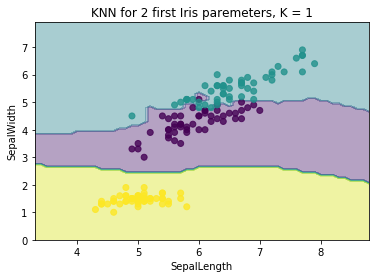

In [26]:
X = iris_rows[:, [0, 2]]
y = binarize_labels(iris_labels)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = KNN(X, y, np.c_[xx.ravel(), yy.ravel()], l2_euclidean_distance, K)

Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("KNN for 2 first Iris paremeters, K = " + str(K))

plt.show()

Results are unclear because to display results on plane only 2 out of 4 paremeters were used. It is not clear enough for KNN how to correctly separate data. K can be increased though to compare tested sample to more train samples.

In [27]:
K = 7

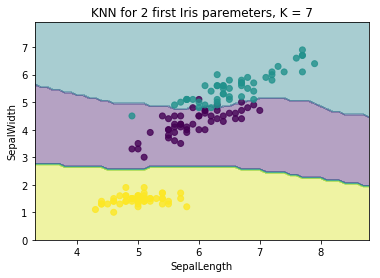

In [28]:
X = iris_rows[:, [0, 2]]
y = binarize_labels(iris_labels)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = KNN(X, y, np.c_[xx.ravel(), yy.ravel()], l2_euclidean_distance, K)

Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("KNN for 2 first Iris paremeters, K = " + str(K))

plt.show()